<a href="https://colab.research.google.com/github/clumsycoder42525/Carbon_footprint_detector/blob/main/CarbonFootprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
materials = {
    "plastic": {"carbon": 2.5, "water": 3.0, "degradable": 400, "recyclable": 1, "biodegradable": 0},
    "paper": {"carbon": 1.2, "water": 2.5, "degradable": 0.5, "recyclable": 1, "biodegradable": 1},
    "glass": {"carbon": 3.0, "water": 2.0, "degradable": 50, "recyclable": 1, "biodegradable": 0},
    "jute": {"carbon": 0.8, "water": 1.5, "degradable": 1, "recyclable": 0, "biodegradable": 1},
    "metal": {"carbon": 4.0, "water": 3.5, "degradable": 100, "recyclable": 1, "biodegradable": 0},
    "cloth": {"carbon": 1.5, "water": 2.0, "degradable": 2, "recyclable": 1, "biodegradable": 1},
}

data = []
for _ in range(50):
    mat = np.random.choice(list(materials.keys()))
    props = materials[mat]

    weight = np.random.uniform(10, 1000)
    volume = np.random.uniform(100, 5000)
    energy = np.random.uniform(0.5, 50)
    reuse = np.random.randint(1, 101)

    carbon = round((weight * props["carbon"] * 0.01 + energy * 0.8 + reuse * -0.01 + np.random.normal(0, 1)), 2)
    water = round((weight * props["water"] * 0.005 + props["degradable"] * 0.1 + reuse * -0.02 + np.random.normal(0, 2)), 2)

    row = {
        "material_type": mat,
        "weight_g": round(weight, 2),
        "volume_ml": round(volume, 2),
        "recyclable": props["recyclable"],
        "degradation_time_years": props["degradable"],
        "production_energy_kWh": round(energy, 2),
        "biodegradable": props["biodegradable"],
        "reuse_count": reuse,
        "carbon_footprint_kgCO2": carbon,
        "water_footprint_liters": water,
    }
    data.append(row)

df = pd.DataFrame(data)
df.to_csv("packaging_footprint_data.csv", index=False)
print(df.head())

  material_type  weight_g  volume_ml  recyclable  degradation_time_years  \
0          jute    474.51    3233.21           0                     1.0   
1       plastic    763.73     784.75           1                   400.0   
2         metal    959.90    4998.19           1                   100.0   
3          jute    390.15    4762.81           0                     1.0   
4         cloth    998.77    1376.87           1                     2.0   

   production_energy_kWh  biodegradable  reuse_count  carbon_footprint_kgCO2  \
0                  36.22              1           47                   31.26   
1                  26.63              0           61                   39.91   
2                  35.21              0           30                   67.26   
3                   4.26              1           10                    6.79   
4                   0.51              1          100                   14.54   

   water_footprint_liters  
0                    5.10  
1     

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
ss=StandardScaler()
numeric_df = df.select_dtypes(include=[np.number])
scaled_numeric = StandardScaler().fit_transform(numeric_df)
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_df.columns)
mms=MinMaxScaler()
mms.fit_transform(numeric_df)

array([[0.45737766, 0.59876514, 0.        , 0.00125156, 0.73206232,
        1.        , 0.45918367, 0.37744871, 0.14273533],
       [0.75672766, 0.04215401, 1.        , 1.        , 0.53546535,
        0.        , 0.60204082, 0.5108746 , 0.92547749],
       [0.95976857, 1.        , 1.        , 0.24906133, 0.71135711,
        0.        , 0.28571429, 0.93274718, 0.5223397 ],
       [0.37006293, 0.9464908 , 0.        , 0.00125156, 0.07687577,
        1.        , 0.08163265, 0.        , 0.09038199],
       [1.        , 0.1767613 , 1.        , 0.00375469, 0.        ,
        1.        , 1.        , 0.11954342, 0.19082538],
       [0.81532044, 0.23099796, 0.        , 0.00125156, 0.08569086,
        1.        , 0.28571429, 0.02683943, 0.16933834],
       [0.72218887, 0.72438831, 1.        , 0.        , 0.36859369,
        1.        , 0.6122449 , 0.25728829, 0.20173943],
       [0.74908918, 0.18570906, 1.        , 0.00375469, 0.49097991,
        1.        , 0.42857143, 0.37806571, 0.13472033],


In [ ]:
X = scaled_numeric_df.drop(["carbon_footprint_kgCO2", "water_footprint_liters"], axis=1)
y = scaled_numeric_df["carbon_footprint_kgCO2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.size,X_train.shape
lr =LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Predicted values:", y_pred[:5])
print("Actual values:   ", y_test[:5].values)

Predicted values: [-0.04895985  0.76169998 -0.08552193 -0.43665554  0.74887955]
Actual values:    [-0.15763429  0.3497291   0.13157002 -0.67289159  0.27294285]


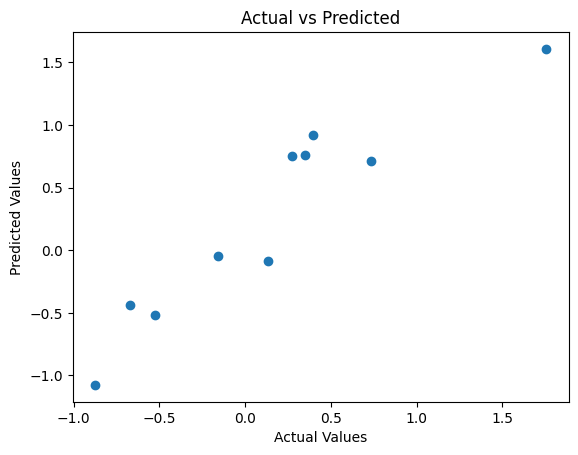

In [ ]:

plt.scatter(y_test, y_pred )
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()



In [ ]:
Sample_input = pd.DataFrame({
    "Weight (g)": [350],
    "Volume (ml)": [1200],
    "Recyclable": [1],
    "Degradation Time (years)": [50],
    "Production Energy (kWh)": [25],
    "Biodegradable": [0],
    "Reuse Count": [15]
})

Model_prediction = lr.predict(StandardScaler().fit_transform(Sample_input))
print("Predicted Carbon Footprint (kgCO2):", Model_prediction)

Predicted Carbon Footprint (kgCO2): [0.02365304]


In [ ]:
Sample_input = pd.DataFrame({
    "Weight (g)": [350],
    "Volume (ml)": [120],
    "Recyclable": [1],
    "Degradation Time (years)": [5],
    "Production Energy (kWh)": [2],
    "Biodegradable": [0],
    "Reuse Count": [15]
})

Model_prediction = lr.predict(StandardScaler().fit_transform(Sample_input))
print("Predicted Carbon Footprint (kgCO2):", Model_prediction)

Predicted Carbon Footprint (kgCO2): [0.02365304]


(100, 3)